In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_train = pd.read_table('data/artificial_train.data', sep=" ", header=None)
y_train = pd.read_table('data/artificial_train.labels', sep=" ", header=None)

In [ ]:
data_train.shape

(2000, 501)

In [ ]:

cv_split = KFold(6, shuffle=True, random_state=123)

In [ ]:
y_train

,0
0,-1
1,-1
2,-1
3,1
4,1
...,...
1995,1
1996,-1
1997,-1
1998,1


In [ ]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,NaN
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,NaN
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,NaN
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,NaN
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,NaN


In [ ]:
# drop column with nan values
nan_column = 500
data_train.drop(columns=[nan_column], inplace=True)

In [ ]:
# kod skopiowany z https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
correlations = get_top_abs_correlations(data_train, 20)

Top Absolute Correlations


In [ ]:
correlations

64   336    0.990429
442  472    0.990300
28   318    0.989628
105  128    0.989410
153  433    0.989355
241  475    0.989272
28   451    0.989168
281  433    0.989047
153  281    0.988695
318  451    0.988690
453  493    0.988458
48   378    0.988338
241  336    0.735253
64   241    0.734728
     475    0.733741
336  475    0.733736
128  455    0.695884
105  455    0.695428
128  338    0.685630
105  338    0.684663
dtype: float64

In [ ]:
columns_to_drop = [64, 442, 28, 105, 153, 241, 318, 281, 453, 48]

data_train.drop(columns=columns_to_drop, inplace=True)

In [ ]:
correlations = get_top_abs_correlations(data_train, 10)

In [ ]:
correlations

336  475    0.733736
128  455    0.695884
     338    0.685630
451  472    0.661783
338  472    0.646701
455  493    0.635489
338  433    0.628206
336  455    0.622168
338  475    0.597291
128  336    0.575316
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_train, y_train, test_size = 0.2, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=123).fit(X_train_scaled, y_train)

In [ ]:
forest_coefs = pd.Series(forest.feature_importances_, index=forest.feature_names_in_)

forest_coefs.sort_values(ascending=False, inplace=True)

In [ ]:
forest_coefs[:50]

x465    0.016748
x330    0.014952
x328    0.009580
x462    0.009513
x124    0.007870
x370    0.007141
x425    0.004371
x483    0.004298
x199    0.004211
x442    0.003582
x219    0.003519
x194    0.003431
x47     0.003418
x275    0.003216
x32     0.003126
x350    0.003102
x310    0.003092
x70     0.003070
x271    0.003048
x132    0.003008
x423    0.002985
x238    0.002961
x152    0.002955
x155    0.002844
x167    0.002835
x10     0.002826
x224    0.002799
x339    0.002792
x291    0.002785
x133    0.002780
x49     0.002772
x326    0.002766
x78     0.002755
x359    0.002722
x18     0.002722
x404    0.002715
x175    0.002713
x301    0.002695
x62     0.002681
x24     0.002675
x136    0.002668
x486    0.002664
x437    0.002649
x177    0.002633
x439    0.002603
x95     0.002601
x355    0.002600
x366    0.002595
x122    0.002586
x445    0.002585
dtype: float64

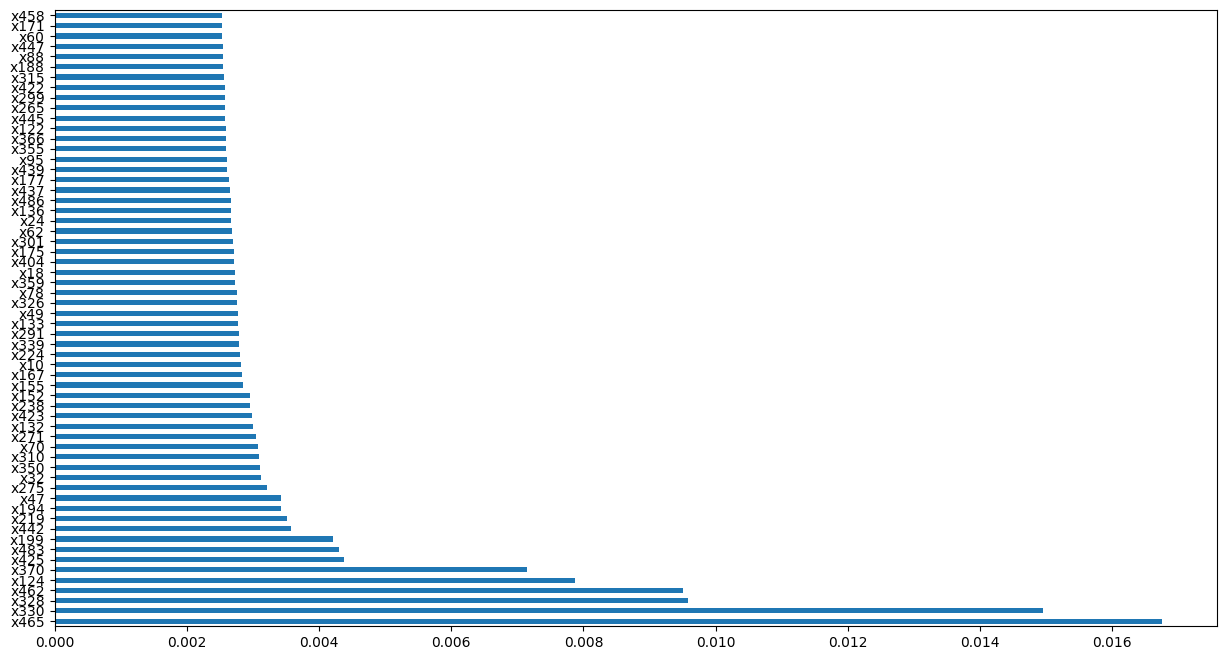

In [ ]:
plt.figure(figsize=(15, 8))
forest_coefs[:60].plot.barh()

plt.savefig('data/forest_coefs', bbox_inches='tight')

In [ ]:
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)
knn_reduced = KNeighborsClassifier().fit(X_train_scaled[forest_coefs[:50].index], y_train)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from itertools import compress

sfs_scores_knn = []
reduced_features_knn = []
current_features_knn = X_train_scaled[forest_coefs[:50].index].columns
number_of_steps = 45

for i in range(1, number_of_steps + 1):
    sfs = SequentialFeatureSelector(estimator=KNeighborsClassifier(), n_features_to_select=50-i, direction='backward', scoring='balanced_accuracy', cv=cv_split, n_jobs=-1)
    sfs.fit(X_train_scaled[current_features_knn], y_train)


    current_features_knn = list(compress(current_features_knn, sfs.get_support()))

    reduced_features_knn.append(current_features_knn)

    cv_score_knn = cross_val_score(KNeighborsClassifier(), X_train_scaled[current_features_knn], y_train, cv=cv_split, scoring='balanced_accuracy')

    print("STEP DONE")
    sfs_scores_knn.append(cv_score_knn)

STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE
STEP DONE


In [ ]:
for i in range(number_of_steps):
    print(f'features: {reduced_features_knn[i]}')
    print(f'mean and std of CV score is {round(np.mean(sfs_scores_knn[i]), 4)}, {round(np.std(sfs_scores_knn[i]), 4)}')

features: ['x465', 'x330', 'x328', 'x462', 'x124', 'x370', 'x425', 'x483', 'x199', 'x442', 'x219', 'x194', 'x47', 'x275', 'x32', 'x350', 'x310', 'x70', 'x271', 'x132', 'x423', 'x238', 'x152', 'x155', 'x167', 'x10', 'x224', 'x339', 'x291', 'x133', 'x49', 'x326', 'x359', 'x18', 'x404', 'x175', 'x301', 'x62', 'x24', 'x136', 'x486', 'x437', 'x177', 'x439', 'x95', 'x355', 'x366', 'x122', 'x445']
mean and std of CV score is 0.6285, 0.0164
features: ['x465', 'x330', 'x328', 'x462', 'x124', 'x370', 'x425', 'x483', 'x199', 'x442', 'x219', 'x194', 'x47', 'x275', 'x32', 'x350', 'x310', 'x70', 'x271', 'x132', 'x238', 'x152', 'x155', 'x167', 'x10', 'x224', 'x339', 'x291', 'x133', 'x49', 'x326', 'x359', 'x18', 'x404', 'x175', 'x301', 'x62', 'x24', 'x136', 'x486', 'x437', 'x177', 'x439', 'x95', 'x355', 'x366', 'x122', 'x445']
mean and std of CV score is 0.635, 0.0207
features: ['x465', 'x330', 'x328', 'x462', 'x124', 'x370', 'x425', 'x483', 'x199', 'x442', 'x219', 'x194', 'x47', 'x275', 'x32', 'x350'

In [ ]:
RANDOM_STATE = 123
SCORING = 'balanced_accuracy'

In [ ]:
base_lr = LogisticRegression()
base_forest = RandomForestClassifier(random_state=RANDOM_STATE)
base_knn = KNeighborsClassifier()
base_LDA = LinearDiscriminantAnalysis()
base_QDA = QuadraticDiscriminantAnalysis()
base_SVC = SVC()
base_nb = GaussianNB()
base_xgb = GradientBoostingClassifier(random_state=RANDOM_STATE)

In [ ]:
base_lr.fit(X_train_scaled, y_train);
base_forest.fit(X_train_scaled, y_train);
base_knn.fit(X_train_scaled, y_train);
base_LDA.fit(X_train_scaled, y_train);
base_QDA.fit(X_train_scaled, y_train);
base_SVC.fit(X_train_scaled, y_train);
base_nb.fit(X_train_scaled, y_train);
base_xgb.fit(X_train_scaled, y_train);

In [ ]:
base_models = [base_lr, base_forest, base_knn, base_LDA, base_QDA, base_SVC, base_nb, base_xgb]
base_models_keys = [
'LogisticRegression',
'RandomForestClassifier',
'KNeighborsClassifier',
'LinearDiscriminantAnalysis',
'QuadraticDiscriminantAnalysis',
'SupportVectorClassifier',
'GausianBN',
'GradientBoostingClassifer'
]

In [ ]:
base_models_test_results = {}
base_models_c_val_results = {}

for idx in range(len(base_models_keys)):
    base_models_test_results[base_models_keys[idx]] = balanced_accuracy_score(y_test, base_models[idx].predict(X_test_scaled))

    base_models_c_val_results[base_models_keys[idx]] = cross_val_score(base_models[idx], X_train_scaled, y_train, cv=cv_split, scoring=SCORING)

In [ ]:
for key in base_models_keys:
    print(f'{key}, balanced accuracy: {base_models_test_results[key]}')
    print(f'{key}, cross val score: {base_models_c_val_results[key].mean()}')

LogisticRegression, balanced accuracy: 0.513157894736842
LogisticRegression, cross val score: 0.5344681038805738
RandomForestClassifier, balanced accuracy: 0.6110275689223058
RandomForestClassifier, cross val score: 0.6290949960555946
KNeighborsClassifier, balanced accuracy: 0.5412280701754386
KNeighborsClassifier, cross val score: 0.5158300119353858
LinearDiscriminantAnalysis, balanced accuracy: 0.5028822055137845
LinearDiscriminantAnalysis, cross val score: 0.5355350983115432
QuadraticDiscriminantAnalysis, balanced accuracy: 0.512781954887218
QuadraticDiscriminantAnalysis, cross val score: 0.5026902743686238
SupportVectorClassifier, balanced accuracy: 0.5342105263157895
SupportVectorClassifier, cross val score: 0.5487673912255061
GausianBN, balanced accuracy: 0.5735588972431078
GausianBN, cross val score: 0.5646213466799596
GradientBoostingClassifer, balanced accuracy: 0.7590225563909774
GradientBoostingClassifer, cross val score: 0.7033448774648944


In [ ]:
base_lr_red = LogisticRegression()
base_forest_red = RandomForestClassifier()
base_knn_red = KNeighborsClassifier()
base_LDA_red = LinearDiscriminantAnalysis()
base_QDA_red = QuadraticDiscriminantAnalysis()
base_SVC_red = SVC()
base_nb_red = GaussianNB()
base_xgb_red = GradientBoostingClassifier(random_state=RANDOM_STATE)

In [ ]:
best_feat_1 = ['x465', 'x330', 'x328', 'x462', 'x124', 'x370', 'x425', 'x483', 'x442'] # topFeaturesSecond
best_feat_2 = ['x465', 'x328', 'x462', 'x124', 'x370', 'x425', 'x483', 'x442'] # subset of topFeaturesSecond
best_feat_3 = ['x465', 'x328', 'x462', 'x370', 'x425', 'x483', 'x442'] # subset of topFeaturesSecond
best_feat_4 = ['x328', 'x462', 'x370', 'x425', 'x483', 'x442'] # subset of topFeaturesSecond

In [ ]:
X_train_scaled

In [ ]:
base_lr_red.fit(X_train_scaled[best_feat_3], y_train)
base_forest_red.fit(X_train_scaled[best_feat_3], y_train)
base_knn_red.fit(X_train_scaled[best_feat_3], y_train)
base_LDA_red.fit(X_train_scaled[best_feat_3], y_train)
base_QDA_red.fit(X_train_scaled[best_feat_3], y_train)
base_SVC_red.fit(X_train_scaled[best_feat_3], y_train)
base_nb_red.fit(X_train_scaled[best_feat_3], y_train)
base_xgb_red.fit(X_train_scaled[best_feat_3], y_train)

GradientBoostingClassifier(random_state=123)

In [ ]:
base_models_red = [base_lr_red, base_forest_red, base_knn_red, base_LDA_red, base_QDA_red, base_SVC_red, base_nb_red, base_xgb_red]
base_models_keys_red = [
'LogisticRegression',
'RandomForestClassifier',
'KNeighborsClassifier',
'LinearDiscriminantAnalysis',
'QuadraticDiscriminantAnalysis',
'SupportVectorClassifier',
'GausianBN',
'GradientBoostingClassifer'
]

In [ ]:
base_models_test_results_red = {}
base_models_c_val_results_red = {}

for idx in range(len(base_models_keys_red)):
    base_models_test_results_red[base_models_keys_red[idx]] = balanced_accuracy_score(y_test, base_models_red[idx].predict(X_test_scaled[best_feat_3]))

    base_models_c_val_results_red[base_models_keys_red[idx]] = cross_val_score(base_models_red[idx], X_train_scaled[best_feat_3], y_train, cv=cv_split, scoring=SCORING)

In [ ]:
for key in base_models_keys_red:
    print(f'{key}, balanced accuracy: {base_models_test_results_red[key]}')
    print(f'{key}, cross val score: {base_models_c_val_results_red[key].mean()}')

LogisticRegression, balanced accuracy: 0.5903508771929824
LogisticRegression, cross val score: 0.6164175926901677
RandomForestClassifier, balanced accuracy: 0.8788220551378446
RandomForestClassifier, cross val score: 0.8701476243283138
KNeighborsClassifier, balanced accuracy: 0.900501253132832
KNeighborsClassifier, cross val score: 0.896124922484624
LinearDiscriminantAnalysis, balanced accuracy: 0.5903508771929824
LinearDiscriminantAnalysis, cross val score: 0.6146319563631203
QuadraticDiscriminantAnalysis, balanced accuracy: 0.7165413533834586
QuadraticDiscriminantAnalysis, cross val score: 0.7016734865905542
SupportVectorClassifier, balanced accuracy: 0.8487468671679198
SupportVectorClassifier, cross val score: 0.839023975647649
GausianBN, balanced accuracy: 0.606265664160401
GausianBN, cross val score: 0.5966962043771663
GradientBoostingClassifer, balanced accuracy: 0.8112781954887218
GradientBoostingClassifer, cross val score: 0.7999335001703479


In [ ]:
grid_svc = {
    'model__C': np.logspace(-3, 3, 100),
    'model__gamma': np.logspace(-9, 3, 100),
    'featureSelector__columns': [best_feat_1, best_feat_2, best_feat_3, best_feat_4]
}
grid_forest = {
    'model__n_estimators': list(range(50, 550, 25)),
    'model__max_depth': [None, *list(range(2, 30))],
    'model__min_samples_split': list(range(2, 11)),
    'model__min_samples_leaf': [1,2,3,4],
    'featureSelector__columns': [best_feat_1, best_feat_2, best_feat_3, best_feat_4]
}
grid_knn = {
    'model__n_neighbors': list(range(3, 31)),
    'model__weights': ['uniform', 'distance'],
    'featureSelector__columns': [best_feat_1, best_feat_2, best_feat_3, best_feat_4]
}

In [ ]:
# Helper to select columns in search CV

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.columns]


pipeline = Pipeline([('selector', FeatureSelector(columns=best_feat_1))
                     ])

In [ ]:

svc_pipe = Pipeline(steps=[
    ('featureSelector', FeatureSelector(columns=best_feat_1)),
    ('model', SVC(probability=True))
])

forest_pipe = Pipeline(steps=[
    ('featureSelector', FeatureSelector(columns=best_feat_1)),
    ('model', RandomForestClassifier(random_state=RANDOM_STATE))
])

gb_pipe = Pipeline(steps=[
    ('featureSelector', FeatureSelector(columns=best_feat_1)),
    ('model', GradientBoostingClassifier(random_state=RANDOM_STATE))
])

knn_pipe = Pipeline(steps=[
    ('featureSelector', FeatureSelector(columns=best_feat_1)),
    ('model', KNeighborsClassifier())
])

svc_search = RandomizedSearchCV(
    estimator=svc_pipe,
    param_distributions=grid_svc,
    cv=cv_split,
    random_state=RANDOM_STATE,
    n_iter=100,
    n_jobs=-1,
    verbose=3,
    scoring=SCORING
    )

knn_search = RandomizedSearchCV(
    estimator=knn_pipe,
    param_distributions=grid_knn,
    cv=cv_split,
    random_state=RANDOM_STATE,
    n_iter=100,
    n_jobs=-1,
    scoring=SCORING
    )

forest_search = RandomizedSearchCV(
    estimator=forest_pipe,
    param_distributions=grid_forest,
    cv=cv_split,
    random_state=RANDOM_STATE,
    n_iter=100,
    n_jobs=-1,
    scoring=SCORING
    )

In [ ]:
svc_search.fit(X_train_scaled, y_train);

Fitting 6 folds for each of 100 candidates, totalling 600 fits


In [ ]:
knn_search.fit(X_train_scaled, y_train);

In [ ]:
forest_search.fit(X_train_scaled, y_train);

In [ ]:
print('SVC best score: ', svc_search.best_score_)
print('SVC best scores std: ', svc_search.cv_results_['std_test_score'][svc_search.best_index_])
print('SVC test score: ', balanced_accuracy_score(y_test, svc_search.best_estimator_.predict(X_test_scaled)))
print('SVC best params: ',svc_search.best_params_)

print('KNN best score: ', knn_search.best_score_)
print('KNN best scores std: ', knn_search.cv_results_['std_test_score'][knn_search.best_index_])
print('KNN test score: ', balanced_accuracy_score(y_test, knn_search.best_estimator_.predict(X_test_scaled)))
print('KNN best params: ', knn_search.best_params_)

print('Forest best score: ', forest_search.best_score_)
print('Forest best scores std: ', forest_search.cv_results_['std_test_score'][forest_search.best_index_])
print('Forest test score: ', balanced_accuracy_score(y_test, forest_search.best_estimator_.predict(X_test_scaled)))
print('Forest best params: ', forest_search.best_params_)

SVC best score:  0.9032291660488775
SVC best scores std:  0.019384312005644336
SVC test score:  0.9
SVC best params:  {'model__gamma': 0.9326033468832219, 'model__C': 1.873817422860385, 'featureSelector__columns': ['x465', 'x330', 'x328', 'x462', 'x124', 'x370', 'x425', 'x483', 'x442']}
KNN best score:  0.9055201212239292
KNN best scores std:  0.019086836729693683
KNN test score:  0.9081453634085213
KNN best params:  {'model__weights': 'distance', 'model__n_neighbors': 6, 'featureSelector__columns': ['x328', 'x462', 'x370', 'x425', 'x483', 'x442']}
Forest best score:  0.8869681991256386
Forest best scores std:  0.022040319772296542
Forest test score:  0.8833333333333333
Forest best params:  {'model__n_estimators': 200, 'model__min_samples_split': 3, 'model__min_samples_leaf': 1, 'model__max_depth': 22, 'featureSelector__columns': ['x465', 'x328', 'x462', 'x124', 'x370', 'x425', 'x483', 'x442']}


In [ ]:
grid_knn_bc = {
    'model__estimator__n_neighbors': list(range(3, 31)),
    'model__n_estimators': list(range(20, 500, 10)),
    'model__estimator__weights': ['uniform', 'distance'],
    'featureSelector__columns': [best_feat_1, best_feat_2, best_feat_3, best_feat_4]
}

grid_svc_bc = {
    'model__estimator__C': np.logspace(-3, 3, 100),
    'model__n_estimators': list(range(10, 70, 10)),
    'model__estimator__gamma': np.logspace(-9, 3, 100),
    'featureSelector__columns': [best_feat_1, best_feat_2, best_feat_3, best_feat_4]
}

knn_bc_pipe = Pipeline(steps=[
    ('featureSelector', FeatureSelector(columns=best_feat_1)),
    ('model', BaggingClassifier(estimator = KNeighborsClassifier(),  n_estimators = 50))
])

svc_bc_pipe = Pipeline(steps=[
    ('featureSelector', FeatureSelector(columns=best_feat_1)),
    ('model', BaggingClassifier(estimator = SVC(probability=True),  n_estimators = 50))
])

knn_bc_search = RandomizedSearchCV(
    estimator=knn_bc_pipe,
    param_distributions=grid_knn_bc,
    cv=cv_split,
    random_state=RANDOM_STATE,
    n_iter=100,
    n_jobs=-1,
    scoring=SCORING
    )

svc_bc_search = RandomizedSearchCV(
    estimator=svc_bc_pipe,
    param_distributions=grid_svc_bc,
    cv=cv_split,
    random_state=RANDOM_STATE,
    n_iter=100,
    n_jobs=-1,
    scoring=SCORING
    )

In [ ]:
knn_bc_search.fit(X_train_scaled, y_train);

In [ ]:
svc_bc_search.fit(X_train_scaled, y_train);

In [ ]:
print('SVC BC best score: ', svc_bc_search.best_score_)
print('SVC BC best scores std: ', svc_bc_search.cv_results_['std_test_score'][svc_bc_search.best_index_])
print('SVC BC test score: ', balanced_accuracy_score(y_test, svc_bc_search.best_estimator_.predict(X_test_scaled)))
print('SVC BC best params: ',svc_bc_search.best_params_)

print('KNN BC best score: ', knn_bc_search.best_score_)
print('KNN BC best scores std: ', knn_bc_search.cv_results_['std_test_score'][knn_bc_search.best_index_])
print('KNN BC test score: ', balanced_accuracy_score(y_test, knn_bc_search.best_estimator_.predict(X_test_scaled)))
print('KNN BC best params: ', knn_bc_search.best_params_)

SVC BC best score:  0.893490102091957
SVC BC best scores std:  0.013335296006876293
SVC BC test score:  0.893107769423559
SVC BC best params:  {'model__n_estimators': 50, 'model__estimator__gamma': 0.40370172585965497, 'model__estimator__C': 0.6135907273413176, 'featureSelector__columns': ['x465', 'x330', 'x328', 'x462', 'x124', 'x370', 'x425', 'x483', 'x442']}
KNN BC best score:  0.901307179687875
KNN BC best scores std:  0.011074743072942745
KNN BC test score:  0.900501253132832
KNN BC best params:  {'model__n_estimators': 20, 'model__estimator__weights': 'uniform', 'model__estimator__n_neighbors': 4, 'featureSelector__columns': ['x465', 'x330', 'x328', 'x462', 'x124', 'x370', 'x425', 'x483', 'x442']}


In [ ]:
grid_vc = {
    'model__svc__gamma': np.logspace(-9, 3, 50),
    'model__svc__C': np.logspace(-3, 3, 50),
    'model__forest__n_estimators': list(range(50, 550, 50)),
    'model__forest__max_depth': [None, *list(range(2, 28))],
    'model__forest__min_samples_split': list(range(2, 10)),
    'model__forest__min_samples_leaf': [1,2,3,4],
    'model__knn__n_neighbors': list(range(3, 15)),
    'model__knn__weights': ['uniform', 'distance'],
    'featureSelector__columns': [best_feat_1, best_feat_2, best_feat_3, best_feat_4]
}

vc_pipe = Pipeline(steps=[
    ('featureSelector', FeatureSelector(columns=best_feat_1)),
    ('model', VotingClassifier(estimators=[
        ('svc', SVC(probability=True)),
        ('forest', RandomForestClassifier(random_state=RANDOM_STATE)),
        ('knn', KNeighborsClassifier())
    ], voting='soft'))
])

vc_search = RandomizedSearchCV(
    estimator=vc_pipe,
    param_distributions=grid_vc,
    cv=cv_split,
    random_state=RANDOM_STATE,
    n_iter=100,
    n_jobs=-1,
    verbose=3,
    scoring=SCORING
    )

In [ ]:
vc_search.fit(X_train_scaled, y_train);

Fitting 6 folds for each of 100 candidates, totalling 600 fits


In [ ]:
print('VC best score: ', vc_search.best_score_)
print('VC best scores std: ', vc_search.cv_results_['std_test_score'][vc_search.best_index_])
print('VC test score: ', balanced_accuracy_score(y_test, vc_search.best_estimator_.predict(X_test_scaled)))
print('VC best params: ',vc_search.best_params_)

VC best score:  0.9022656922487072
VC best scores std:  0.01731227415220158
VC test score:  0.9052631578947369
VC best params:  {'model__svc__gamma': 5.1794746792312124e-08, 'model__svc__C': 754.3120063354608, 'model__knn__weights': 'distance', 'model__knn__n_neighbors': 7, 'model__forest__n_estimators': 500, 'model__forest__min_samples_split': 5, 'model__forest__min_samples_leaf': 2, 'model__forest__max_depth': 15, 'featureSelector__columns': ['x328', 'x462', 'x370', 'x425', 'x483', 'x442']}


In [ ]:
grid_vc_bc = {
    'model__svc__estimator__gamma': np.logspace(-9, 3, 30),
    'model__svc__estimator__C': np.logspace(-3, 3, 30),
    'model__svc__n_estimators': list(range(10, 70, 10)),
    'model__forest__n_estimators': list(range(50, 300, 50)),
    'model__forest__max_depth': [None, *list(range(2, 20, 2))],
    'model__forest__min_samples_split': list(range(2, 8)),
    'model__forest__min_samples_leaf': [1,2,3,4],
    'model__knn__estimator__n_neighbors': list(range(3, 9)),
    'model__knn__estimator__weights': ['uniform', 'distance'],
    'model__knn__n_estimators': list(range(20, 140, 20)),
    'featureSelector__columns': [best_feat_1, best_feat_2, best_feat_3, best_feat_4]
}

vc_bc_pipe = Pipeline(steps=[
    ('featureSelector', FeatureSelector(columns=best_feat_1)),
    ('model', VotingClassifier(estimators=[
        ('svc', BaggingClassifier(estimator = SVC(probability=True),  n_estimators = 50)),
        ('forest', RandomForestClassifier(random_state=RANDOM_STATE)),
        ('knn', BaggingClassifier(estimator = KNeighborsClassifier(),  n_estimators = 50))
    ], voting='soft'))
])

vc_bc_search = RandomizedSearchCV(
    estimator=vc_bc_pipe,
    param_distributions=grid_vc_bc,
    cv=cv_split,
    random_state=RANDOM_STATE,
    n_iter=100,
    n_jobs=-1,
    scoring=SCORING
    )

In [ ]:
vc_bc_search.fit(X_train_scaled, y_train);

In [ ]:
print('VC BC best score: ', vc_bc_search.best_score_)
print('VC BC best scores std: ', vc_bc_search.cv_results_['std_test_score'][vc_bc_search.best_index_])
print('VC BC test score: ', balanced_accuracy_score(y_test, vc_bc_search.best_estimator_.predict(X_test_scaled)))
print('VC BC best params: ', vc_bc_search.best_params_)

VC BC best score:  0.9047783678961828
VC BC best scores std:  0.01253754835422797
VC BC test score:  0.900501253132832
VC BC best params:  {'model__svc__n_estimators': 50, 'model__svc__estimator__gamma': 1.2689610031679235, 'model__svc__estimator__C': 92.36708571873865, 'model__knn__n_estimators': 60, 'model__knn__estimator__weights': 'uniform', 'model__knn__estimator__n_neighbors': 6, 'model__forest__n_estimators': 250, 'model__forest__min_samples_split': 7, 'model__forest__min_samples_leaf': 4, 'model__forest__max_depth': 14, 'featureSelector__columns': ['x465', 'x328', 'x462', 'x370', 'x425', 'x483', 'x442']}


In [ ]:
models = [svc_search.best_estimator_, knn_search.best_estimator_, forest_search.best_estimator_, svc_bc_search.best_estimator_, knn_bc_search.best_estimator_, vc_search.best_estimator_, vc_bc_search.best_estimator_]
cv_scores = [cross_val_score(model, X_train_scaled, y_train, cv=cv_split, scoring='balanced_accuracy') for model in models]
b_a_scores = [balanced_accuracy_score(y_test, model.predict(X_test_scaled)) for model in models]

results = pd.DataFrame({
    'name': ['SVC',
             'KNN',
             'RandomForest',
             'SVCBagging',
             'KNNBagging',
             'Voting',
             'BaggingVoting'],
    'CVScore': [np.mean(scores) for scores in cv_scores],
    'CVScoreStd': [np.std(scores) for scores in cv_scores],
    'testScore': b_a_scores
})

In [ ]:
results.to_csv('data/results.csv')

In [ ]:
results

,name,CVScore,CVScoreStd,testScore
0,SVC,0.903229,0.019384,0.900000
1,KNN,0.905520,0.019087,0.908145
2,RandomForest,0.886968,0.022040,0.883333
3,SVCBagging,0.906415,0.014001,0.897619
4,KNNBagging,0.898775,0.015895,0.887594
5,Voting,0.899846,0.013205,0.905263
6,BaggingVoting,0.904234,0.015530,0.900501


In [ ]:
unseen_data = pd.read_csv('data/artificial_test.data', sep=" ", header=None)

In [ ]:
unseen_data_scaled = scaler.transform(unseen_data[data_train.columns])

In [ ]:
svc_preds_prob = svc_search.best_estimator_.predict_proba(unseen_data_scaled)
knn_preds_prob = knn_search.best_estimator_.predict_proba(unseen_data_scaled)
forest_preds_prob = forest_search.best_estimator_.predict_proba(unseen_data_scaled)
svc_bc_preds_prob = svc_bc_search.best_estimator_.predict_proba(unseen_data_scaled)
knn_bc_preds_prob = knn_bc_search.best_estimator_.predict_proba(unseen_data_scaled)
vc_preds_prob = vc_search.best_estimator_.predict_proba(unseen_data_scaled)
vc_bc_preds_prob = vc_bc_search.best_estimator_.predict_proba(unseen_data_scaled)

In [ ]:
svc_search.best_estimator_.classes_

array([-1,  1])

In [ ]:
np.savetxt('results/313291_313476_svc.txt', svc_preds_prob[:, 1])

np.savetxt('results/313291_313476_knn.txt', knn_preds_prob[:, 1])

np.savetxt('results/313291_313476_forest.txt', forest_preds_prob[:, 1])

np.savetxt('results/313291_313476_svc_bc.txt', svc_bc_preds_prob[:, 1])

np.savetxt('results/313291_313476_knn_bc.txt', knn_bc_preds_prob[:, 1])

np.savetxt('results/313291_313476_vc.txt', vc_preds_prob[:, 1])

np.savetxt('results/313291_313476_vc_bc.txt', vc_bc_preds_prob[:, 1])